In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('pollution_india_2010.csv')

non_df=df.replace('Null',np.nan).dropna(axis=0)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   City    181 non-null    object
 1   NO2     181 non-null    object
 2   PM10    181 non-null    object
 3   SO2     181 non-null    object
 4   State   181 non-null    object
dtypes: object(5)
memory usage: 7.2+ KB


In [4]:
non_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175 entries, 0 to 180
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   City    175 non-null    object
 1   NO2     175 non-null    object
 2   PM10    175 non-null    object
 3   SO2     175 non-null    object
 4   State   175 non-null    object
dtypes: object(5)
memory usage: 8.2+ KB


In [5]:
non_df[['NO2','PM10','SO2']]=non_df[['NO2','PM10','SO2']].astype('int')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   City    181 non-null    object
 1   NO2     181 non-null    object
 2   PM10    181 non-null    object
 3   SO2     181 non-null    object
 4   State   181 non-null    object
dtypes: object(5)
memory usage: 7.2+ KB


In [7]:
df.head()

,City,NO2,PM10,SO2,State
0,Chitoor,9,39,4,Andhra Pradesh
1,Guntur,11,81,2,Andhra Pradesh
2,Hydrabad,24,79,5,Andhra Pradesh
3,Kothagudem,11,62,2,Andhra Pradesh
4,Kurnool,9,85,4,Andhra Pradesh


## Data Analysis

### 1. Top 10 CITY Releaser

In [8]:
state_wise=non_df[['City','NO2']]
top_state_releaser=state_wise.sort_values(by='NO2',axis=0,ascending=False)[:10]
print(top_state_releaser)

               City  NO2
176          Howrah   75
173     Barrackpore   74
99         Badlapur   73
115      Ulhasnagar   68
174        Durgapur   66
172         Asansol   66
179        Sankrail   65
178        Raniganj   63
177         Kolkata   62
180  South Suburban   56


In [9]:
import seaborn as sn
sn.set(style="whitegrid" , rc={'figure.figsize':(10,5)} , palette = "Blues")

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

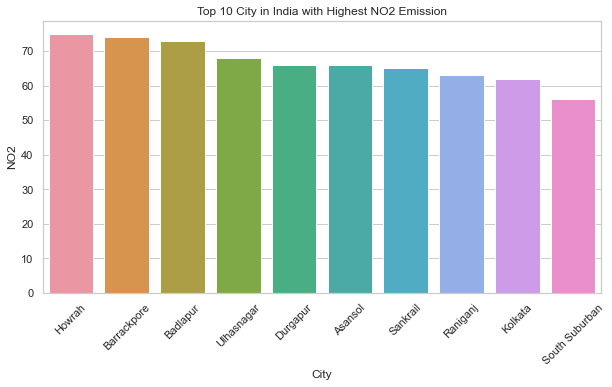

In [10]:
sn.barplot(x='City',y='NO2',data=top_state_releaser)
plt.title("Top 10 City in India with Highest NO2 Emission")
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

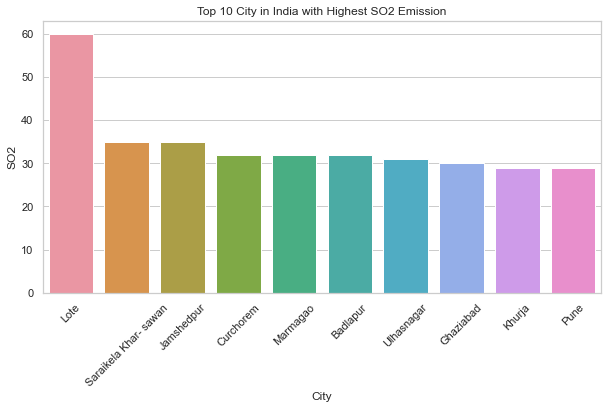

In [11]:
city_wise_SO2=non_df[['City','SO2']]

top_city_SO2=city_wise_SO2.sort_values(by="SO2",axis=0,ascending=False)[:10]

sn.barplot(x='City',y='SO2',data=top_city_SO2)
plt.title("Top 10 City in India with Highest SO2 Emission")
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

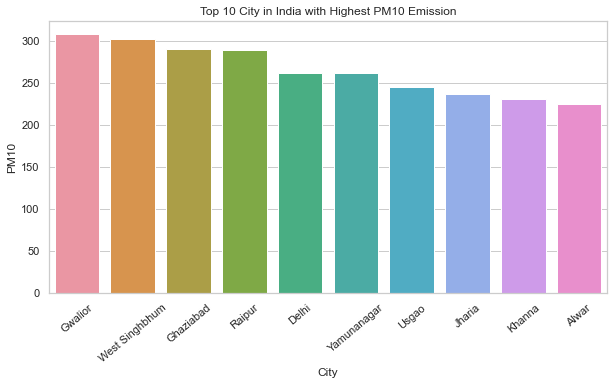

In [12]:
city_wise_PM10=non_df[['City','PM10']]
top_city_PM10=city_wise_PM10.sort_values(by="PM10",axis=0,ascending=False)[:10]

sn.barplot(x='City',y='PM10',data=top_city_PM10)
plt.title("Top 10 City in India with Highest PM10 Emission")
plt.xticks(rotation=40)

## Top 10 State Releaser 

In [13]:
state_releaser=pd.DataFrame(non_df.groupby('State')['NO2','PM10','SO2'].mean().reset_index())
state_releaser.head()

C:\Users\shavej shaikh\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,State,NO2,PM10,SO2
0,Andhra Pradesh,14.076923,68.692308,4.615385
1,Assam,14.750000,69.500000,6.166667
2,Bihar,40.000000,181.000000,7.000000
3,Chandigarh,16.000000,92.000000,2.000000
4,Chattisgarh,28.666667,167.333333,12.333333


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
 <a list of 29 Text major ticklabel objects>)

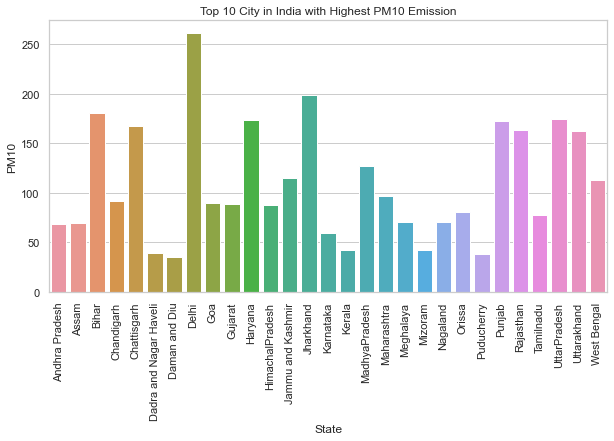

In [14]:
sn.barplot(x='State',y='PM10',data=state_releaser)
plt.title("Top 10 City in India with Highest PM10 Emission")
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
 <a list of 29 Text major ticklabel objects>)

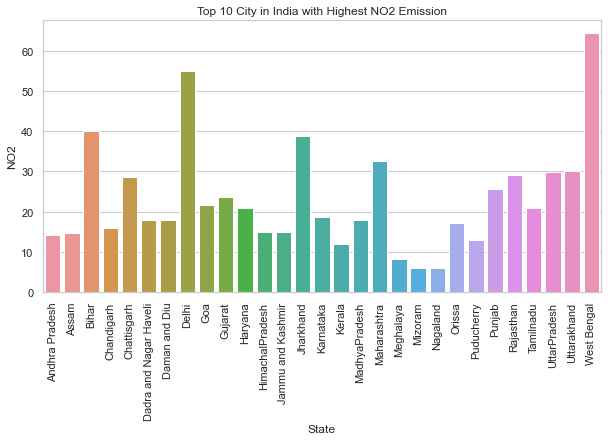

In [15]:
sn.barplot(x='State',y='NO2',data=state_releaser)
plt.title("Top 10 City in India with Highest NO2 Emission")
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
 <a list of 29 Text major ticklabel objects>)

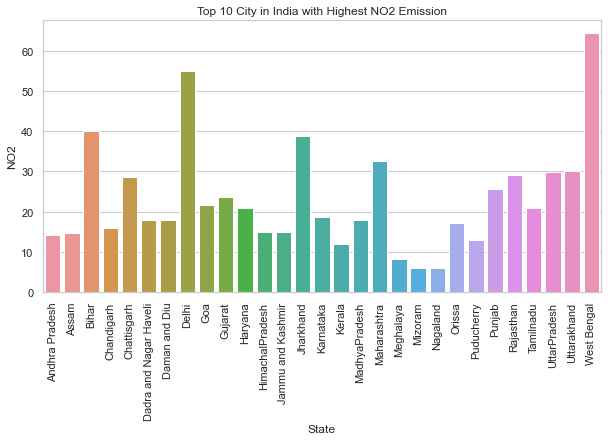

In [16]:
sn.barplot(x='State',y='NO2',data=state_releaser)
plt.title("Top 10 City in India with Highest NO2 Emission")
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
 <a list of 29 Text major ticklabel objects>)

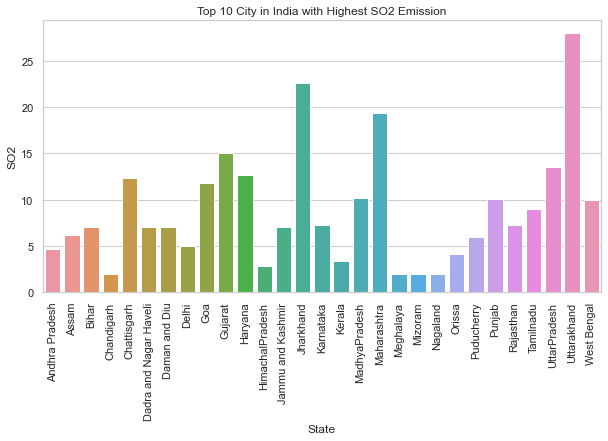

In [17]:
sn.barplot(x='State',y='SO2',data=state_releaser)
plt.title("Top 10 City in India with Highest SO2 Emission")
plt.xticks(rotation=90)

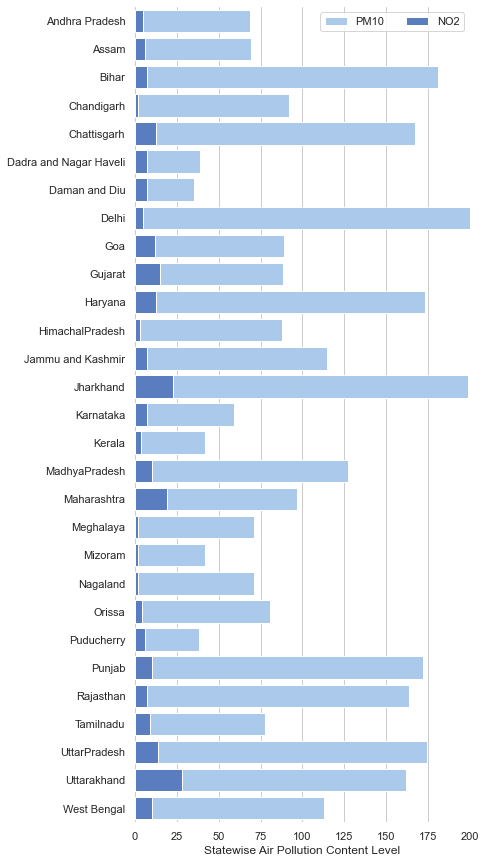

In [18]:
f, ax = plt.subplots(figsize=(6, 15))
sn.set_color_codes('pastel')
sn.barplot(x='PM10',y='State',data=state_releaser,color='b',label='PM10')
sn.set_color_codes('muted')
sn.barplot(x='SO2',y='State',data=state_releaser,label='NO2',color='b')

ax.legend(ncol=2, loc="best", frameon=True)
ax.set(xlim=(0, 200), ylabel="",xlabel="Statewise Air Pollution Content Level")
sn.despine(left=True, bottom=True)

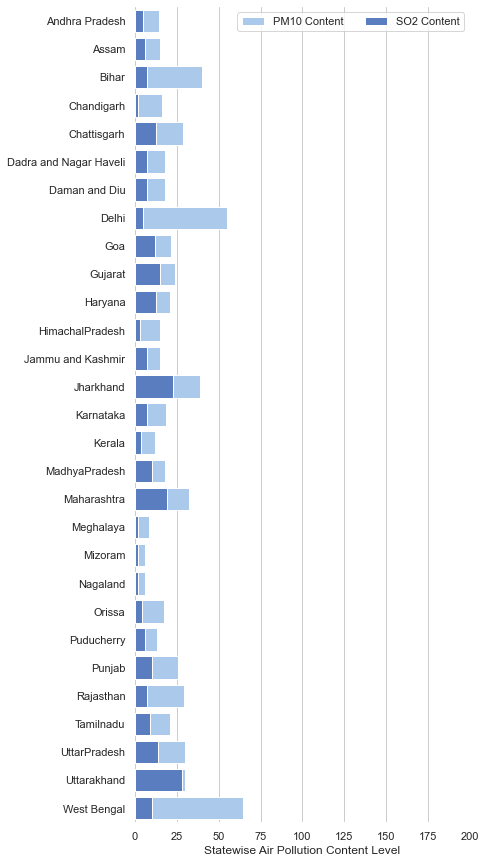

In [19]:
f, ax = plt.subplots(figsize=(6, 15))

sn.set_color_codes("pastel")
sn.barplot(x = "NO2" , y= "State" , data = state_releaser, label = "PM10 Content" , color = "b" )
sn.set_color_codes("muted")
sn.barplot(x = "SO2" , y= "State", data = state_releaser, label = "SO2 Content" , color = "b")


ax.legend(ncol=2, loc="best", frameon=True)
ax.set(xlim=(0, 200), ylabel="",xlabel="Statewise Air Pollution Content Level")
sn.despine(left=True, bottom=True)

Text(0.5, 1.0, 'Statewise NO2, SO2, PM10 Level')

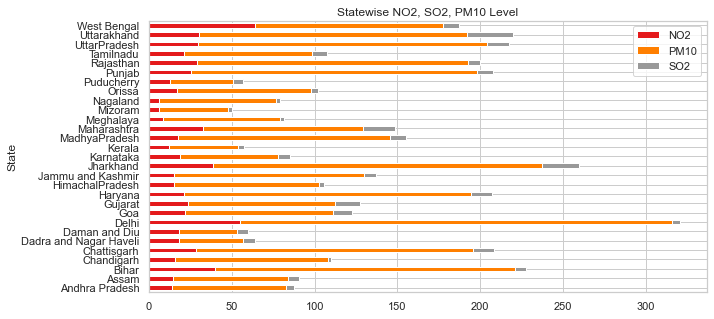

In [20]:
state_releaser.set_index('State').plot(kind='barh', stacked=True , cmap = "Set1" )
plt.title("Statewise NO2, SO2, PM10 Level")

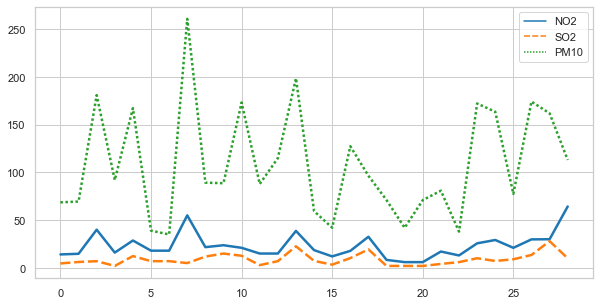

In [21]:
sn.lineplot(data=state_releaser[['NO2','SO2','PM10']],palette='tab10',linewidth=2.5)

Text(0.5, 1.0, 'NO2, PM10, SO2')

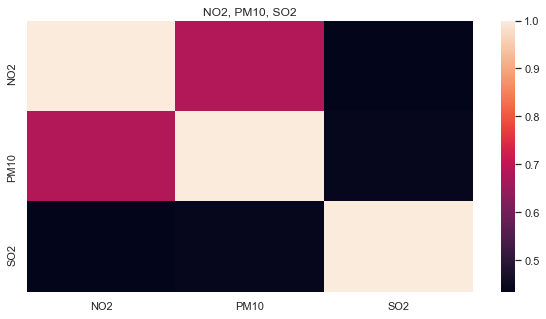

In [22]:
sn.heatmap(state_releaser.corr())
plt.title("NO2, PM10, SO2")

### Least Emit Top 10 State 

          City  NO2
76   Alappuzha    5
81   Malapuram    5
122     Kohima    5
82    Palakkad    6
94       Satna    6
117      Dawki    6
120     Aizawl    6
121    Dimapur    7
84     Thissur    7
74   Mangalore    8


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

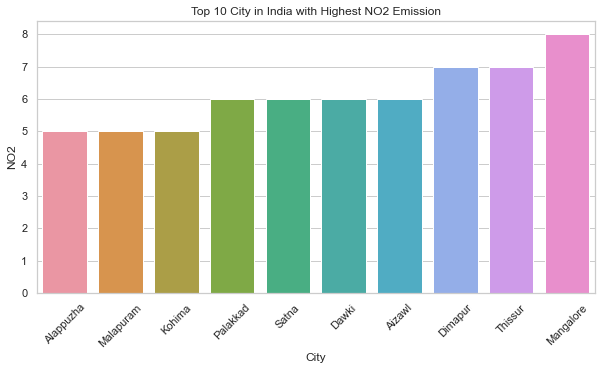

In [23]:
state_wises=non_df[['City','NO2']]
top_state_releaser_des=state_wises.sort_values(by='NO2',axis=0,ascending=True)[:10]
print(top_state_releaser_des)
sn.barplot(x='City',y='NO2',data=top_state_releaser_des)
plt.title("Top 10 City in India with Highest NO2 Emission")
plt.xticks(rotation=45)